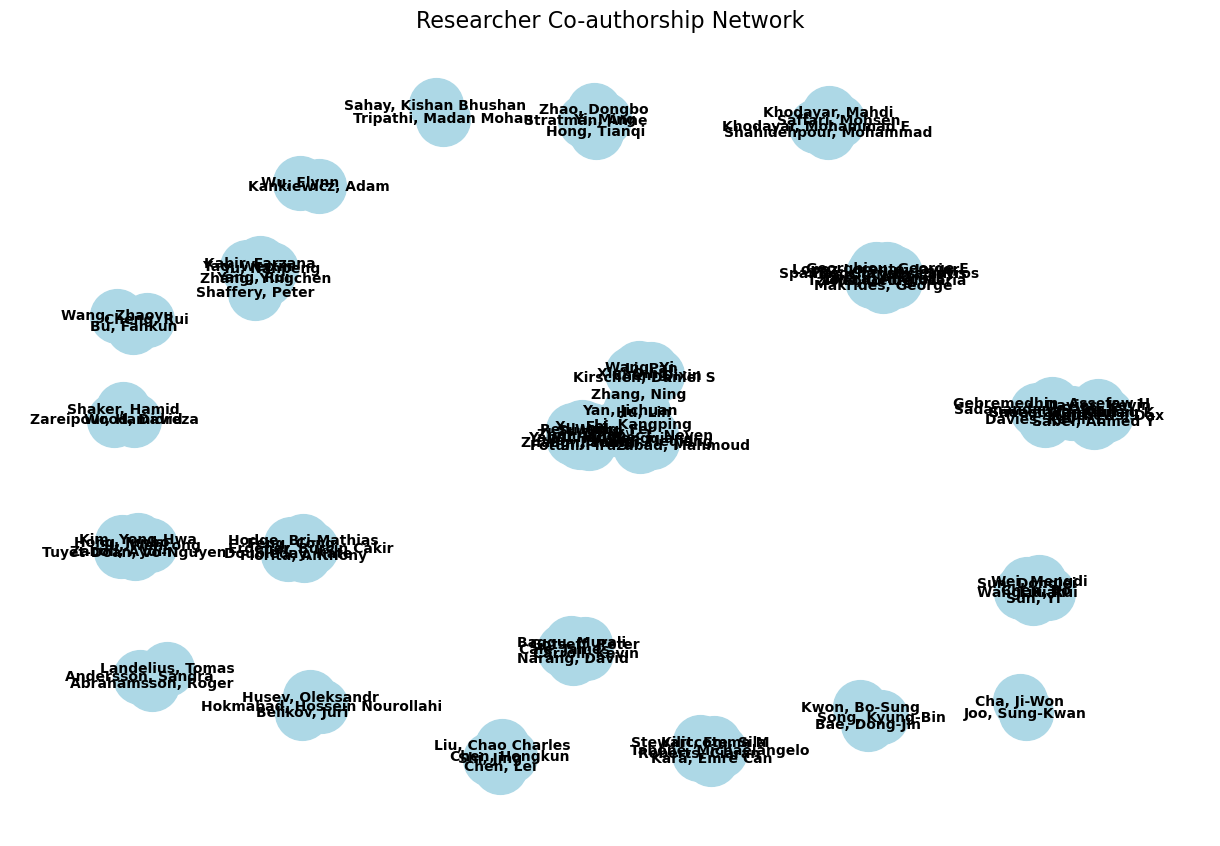

In [7]:
import bibtexparser
import networkx as nx
import matplotlib.pyplot as plt

bib_file_path = r"G:\My Drive\WVU_academic\CS_630\final_project_paper\meta_ref.bib"

with open(bib_file_path, 'r') as bibfile:
    bib_database = bibtexparser.load(bibfile)

# Extract authors from each entry
co_authors = []
for entry in bib_database.entries:
    if 'author' in entry:
        authors = [author.strip() for author in entry['author'].split(' and ')]
        co_authors.append(authors)

# Build the co-authorship graph
G = nx.Graph()

for authors in co_authors:
    for i, author1 in enumerate(authors):
        for author2 in authors[i+1:]:
            if not G.has_edge(author1, author2):
                G.add_edge(author1, author2)

# Visualize the graph
plt.figure(figsize=(12, 8))
nx.draw(
    G, with_labels=True, node_color='lightblue', edge_color='gray',
    node_size=1500, font_size=10, font_weight='bold'
)
plt.title("Researcher Co-authorship Network", fontsize=16)
plt.show()


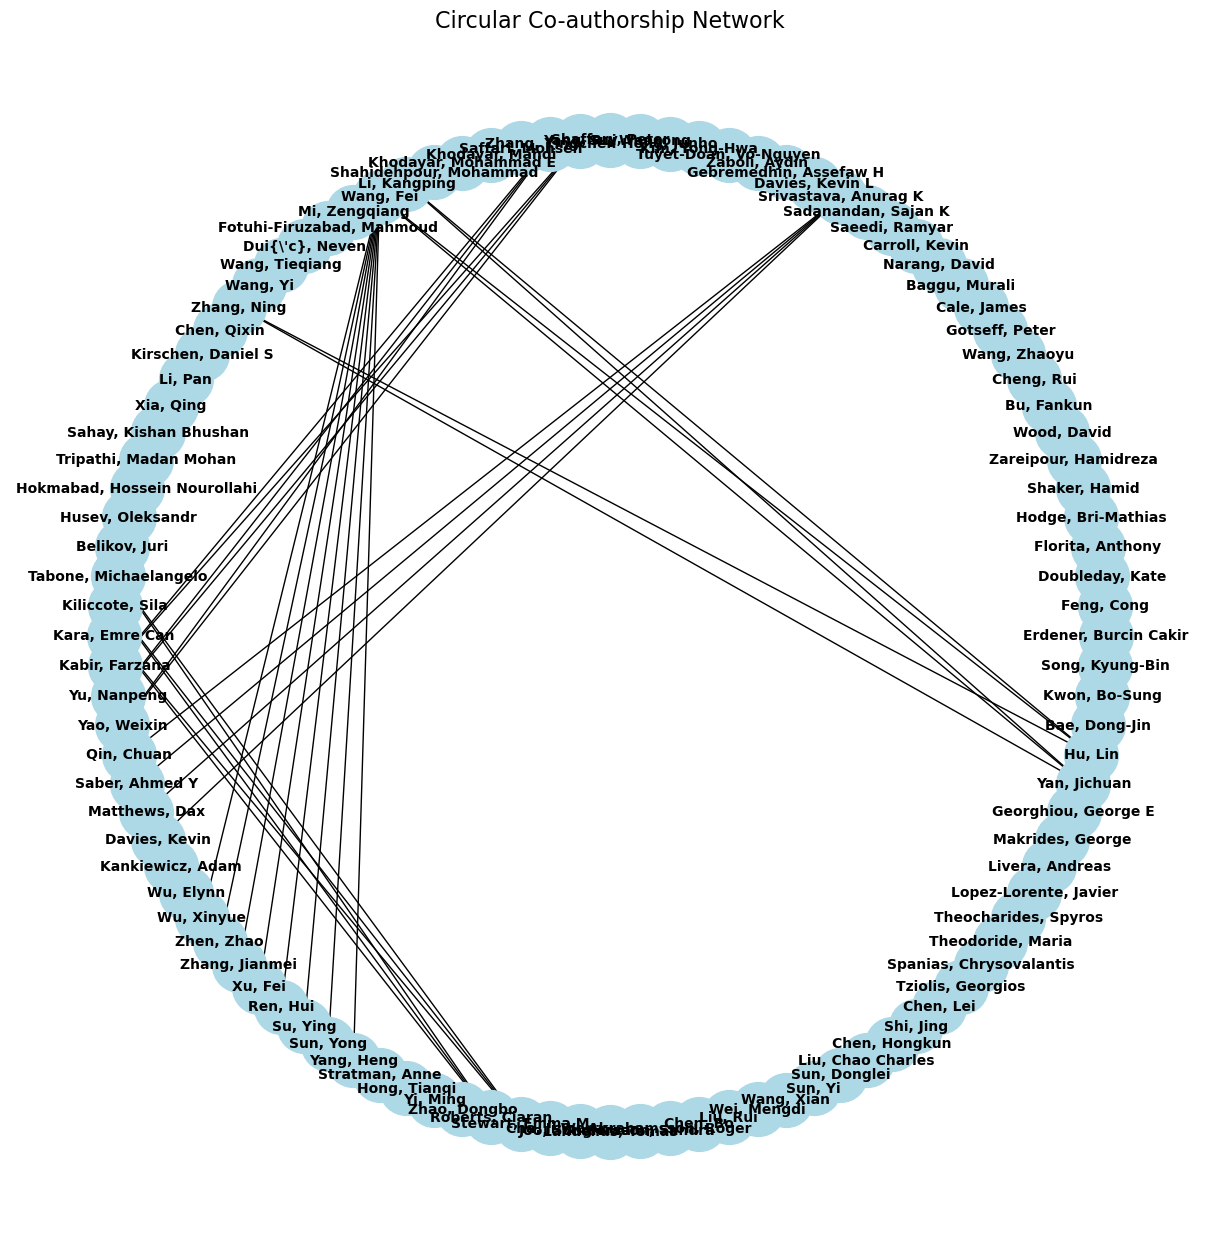

In [11]:
plt.figure(figsize=(12, 12))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', font_size=10, font_weight='bold')
plt.title("Circular Co-authorship Network", fontsize=16)
plt.show()

Total number of clusters: 20

Cluster 1 (Size: 5):
Feng, Cong, Florita, Anthony, Doubleday, Kate, Hodge, Bri-Mathias, Erdener, Burcin Cakir
----------------------------------------
Cluster 2 (Size: 3):
Wood, David, Zareipour, Hamidreza, Shaker, Hamid
----------------------------------------
Cluster 3 (Size: 3):
Bu, Fankun, Cheng, Rui, Wang, Zhaoyu
----------------------------------------
Cluster 4 (Size: 5):
Narang, David, Carroll, Kevin, Gotseff, Peter, Baggu, Murali, Cale, James
----------------------------------------
Cluster 5 (Size: 9):
Srivastava, Anurag K, Davies, Kevin L, Gebremedhin, Assefaw H, Saeedi, Ramyar, Qin, Chuan, Sadanandan, Sajan K, Saber, Ahmed Y, Matthews, Dax, Davies, Kevin
----------------------------------------
Cluster 6 (Size: 5):
Tuyet-Doan, Vo-Nguyen, Hong, Junho, Zaboli, Aydin, Su, Wencong, Kim, Yong-Hwa
----------------------------------------
Cluster 7 (Size: 6):
Yang, Rui, Yu, Nanpeng, Shaffery, Peter, Kabir, Farzana, Yao, Weixin, Zhang, Yingchen
-------

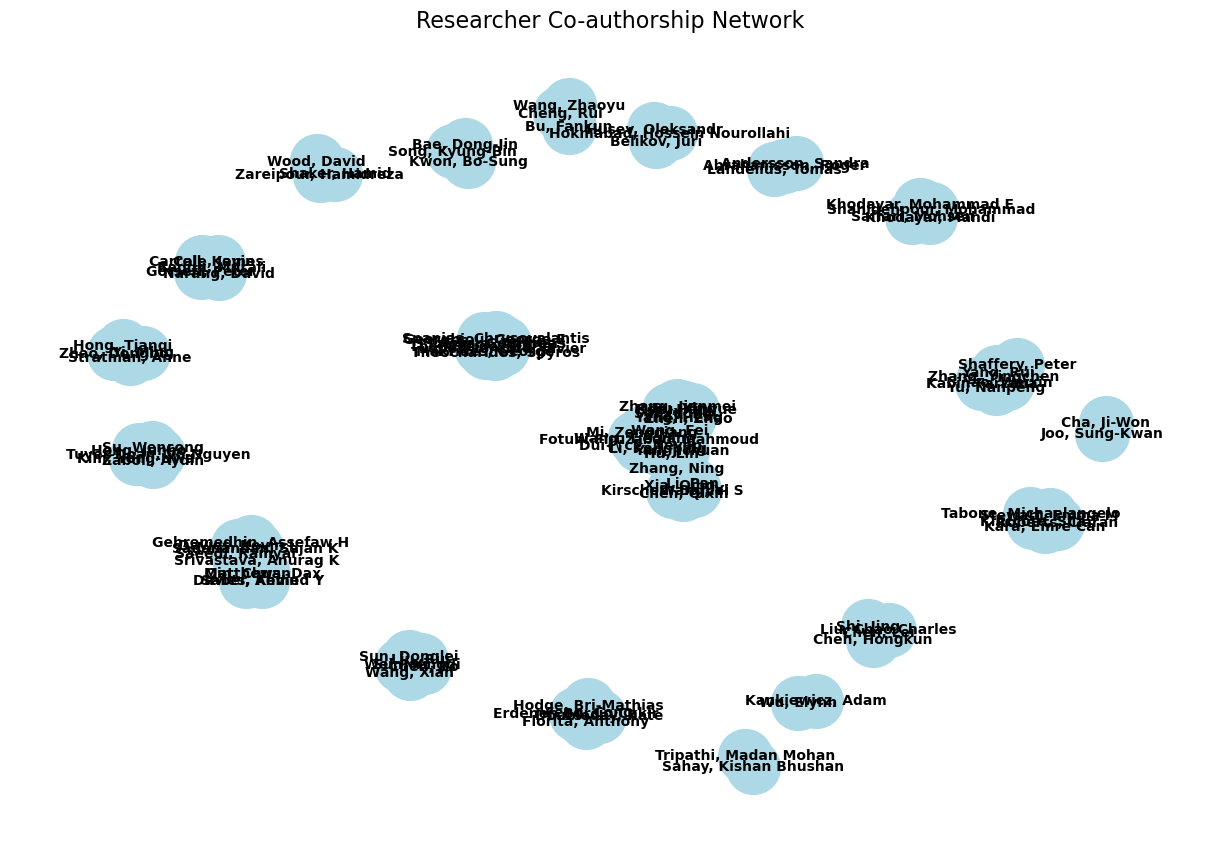

In [8]:
import bibtexparser
import networkx as nx
import matplotlib.pyplot as plt

bib_file_path = r"G:\My Drive\WVU_academic\CS_630\final_project_paper\meta_ref.bib"

with open(bib_file_path, 'r') as bibfile:
    bib_database = bibtexparser.load(bibfile)

# Extract authors from each entry
co_authors = []
for entry in bib_database.entries:
    if 'author' in entry:
        authors = [author.strip() for author in entry['author'].split(' and ')]
        co_authors.append(authors)

G = nx.Graph()

for authors in co_authors:
    for i, author1 in enumerate(authors):
        for author2 in authors[i+1:]:
            if not G.has_edge(author1, author2):
                G.add_edge(author1, author2)

clusters = list(nx.connected_components(G))  # List of connected components (clusters)

print(f"Total number of clusters: {len(clusters)}\n")
for idx, cluster in enumerate(clusters):
    print(f"Cluster {idx + 1} (Size: {len(cluster)}):")
    print(", ".join(cluster))
    print("-" * 40)

plt.figure(figsize=(12, 8))
nx.draw(
    G, with_labels=True, node_color='lightblue', edge_color='gray',
    node_size=1500, font_size=10, font_weight='bold'
)
plt.title("Researcher Co-authorship Network", fontsize=16)
# plt.show()


In [13]:
import bibtexparser
import networkx as nx

# Path to your BibTeX file
bib_file_path = r"G:\My Drive\WVU_academic\CS_630\final_project_paper\meta_ref.bib"

# Load BibTeX data
with open(bib_file_path, 'r') as bibfile:
    bib_database = bibtexparser.load(bibfile)

# Initialize a dictionary to store papers and their authors
papers_and_authors = {}

# Extract authors and corresponding paper labels
for entry in bib_database.entries:
    if 'author' in entry and 'ID' in entry:
        authors = [author.strip() for author in entry['author'].split(' and ')]
        papers_and_authors[entry['ID']] = authors

# Build the co-authorship graph
G = nx.Graph()

for paper, authors in papers_and_authors.items():
    for i, author1 in enumerate(authors):
        for author2 in authors[i + 1:]:
            if not G.has_edge(author1, author2):
                G.add_edge(author1, author2, paper=paper)

# Extract clusters of authors
clusters = list(nx.connected_components(G))

# Map clusters to their corresponding papers
cluster_papers = {}
for cluster_id, cluster in enumerate(clusters):
    cluster_papers[cluster_id] = {
        'authors': list(cluster),
        'papers': [
            paper for paper, authors in papers_and_authors.items()
            if any(author in cluster for author in authors)
        ]
    }

# Display results
print(f"Total number of clusters: {len(clusters)}\n")
for idx, cluster in cluster_papers.items():
    print(f"Cluster {idx + 1} (Size: {len(cluster['authors'])}):")
    print("Authors: " + ", ".join(cluster['authors']))
    print("Papers: " + ", ".join(cluster['papers']))
    print("-" * 40)

# Now you can use `cluster_papers` to create tables


Total number of clusters: 20

Cluster 1 (Size: 5):
Authors: Feng, Cong, Florita, Anthony, Doubleday, Kate, Hodge, Bri-Mathias, Erdener, Burcin Cakir
Papers: erdener2022review
----------------------------------------
Cluster 2 (Size: 3):
Authors: Wood, David, Zareipour, Hamidreza, Shaker, Hamid
Papers: shaker2015data
----------------------------------------
Cluster 3 (Size: 3):
Authors: Bu, Fankun, Cheng, Rui, Wang, Zhaoyu
Papers: bu2022two
----------------------------------------
Cluster 4 (Size: 5):
Authors: Narang, David, Carroll, Kevin, Gotseff, Peter, Baggu, Murali, Cale, James
Papers: gotseff2014accurate
----------------------------------------
Cluster 5 (Size: 9):
Authors: Srivastava, Anurag K, Davies, Kevin L, Gebremedhin, Assefaw H, Saeedi, Ramyar, Qin, Chuan, Sadanandan, Sajan K, Saber, Ahmed Y, Matthews, Dax, Davies, Kevin
Papers: saeedi2021adaptive, qin2023geometric
----------------------------------------
Cluster 6 (Size: 5):
Authors: Tuyet-Doan, Vo-Nguyen, Hong, Junho, Zab

In [ ]:
## Meta data analysis for dataset, models, and performance results

import json
import pandas as pd

    
file_path = r"G:\My Drive\WVU_academic\CS_630\final_project_paper\meta_paper_information.txt"

with open(file_path, 'r') as f:
    file_content = f.read()

data = {}
exec(file_content, {}, data)

dataset_summary = []

generic_dataset_mapping = {
    "Pecan Street": "Pecan Street Dataset",
    "Ausgrid": "Ausgrid Dataset",
    "NREL": "NREL Dataset",
    "ISO New England": "ISO NE Dataset",
    "Maui Meadows Feeder Dataset": "Maui Dataset",
    "Korean Power System Data": "Korean Power Dataset",
    "Tekniska Verken": "Swedish Dataset",
    "Open-Meteo API": "European Dataset",
    "Solar Radiation Research Laboratory (SRRL)": "NREL Dataset",
    "Korea Meteorological Administration (KMA)": "Korean Power Dataset",
    "SCADA system of the distribution system operator (DSO) of Cyprus": "Cyprus Dataset",
    "Maui Advanced Solar Initiative": "Maui Dataset",
    "Nagasa Dataset": "Generic Public Dataset",
    "Simulation dataset generated using GridLab-D": "Simulated Dataset",
    "Measured PV output data from Tallinn, Estonia": "European Dataset",
    "Utility X": "Generic Public Dataset",
}

for ref in data["data"]["references"]:
    if "Dataset" in ref and ref["Dataset"]:
        dataset_info = ref["Dataset"]
        dataset_name = dataset_info.get("Name/Source", "Unknown")
        if isinstance(dataset_name, list):
            for name in dataset_name:
                generic_name = next(
                    (generic_dataset_mapping[key] for key in generic_dataset_mapping if key in name), "Other Dataset"
                )
                dataset_summary.append({
                    "Dataset Name": generic_name,
                    "Resolution": dataset_info.get("Resolution", "Unknown"),
                    "Location": dataset_info.get("Coverage", "Unknown"),
                    "Referred": ref["label"]
                })
        else:
            generic_name = next(
                (generic_dataset_mapping[key] for key in generic_dataset_mapping if key in dataset_name), "Other Dataset"
            )
            dataset_summary.append({
                "Dataset Name": generic_name,
                "Resolution": dataset_info.get("Resolution", "Unknown"),
                "Location": dataset_info.get("Coverage", "Unknown"),
                "Referred": ref["label"]
            })

dataset_df = pd.DataFrame(dataset_summary)

final_dataset_summary = dataset_df.groupby(["Dataset Name", "Resolution", "Location"]).agg({
    "Referred": lambda x: ", ".join(x)
}).reset_index()

final_dataset_summary.rename(columns={"Referred": "Papers"}, inplace=True)


In [ ]:
print(final_dataset_summary)

In [28]:
## extracting only model information

import json

    
file_path = r"G:\My Drive\WVU_academic\CS_630\final_project_paper\meta_paper_information.txt"

with open(file_path, 'r') as f:
    file_content = f.read()

data = {}
exec(file_content, {}, data)

models_by_label = {}

for ref in data["data"]["references"]:
    label = ref.get("label")
    model_info = ref.get("Model")
    if label and model_info:
        models_by_label[label] = model_info


for label, model in models_by_label.items():
    print(f"Label: {label}")
    print("Model Information:")
    print(json.dumps(model, indent=4))
    print("-" * 40)

#  storing in another dictionary format
models_dict = {label: model for label, model in models_by_label.items()}

Label: shaker2015data
Model Information:
{
    "Model Type": [
        "Principal Component Analysis (PCA)",
        "k-Means Clustering",
        "Proposed Hybrid k-Means + PCA Approach",
        "Relief",
        "Correlation-Based Feature Selection (CFS)",
        "Linear Regression",
        "Kalman Filter",
        "Multi-Layer Perceptrons (MLP)",
        "Wavelet Neural Networks (WNN)"
    ],
    "Model Inputs": [
        "Power generation data",
        "Location data (longitude and latitude)"
    ],
    "Training Techniques": [
        "Training on 4 months of data and testing on the remaining 8 months",
        "Trial-and-error for model configuration (e.g., lag determination, neuron counts in MLP)"
    ],
    "Validation Approach": "Train-test split (4 months training, 8 months testing)"
}
----------------------------------------
Label: bu2022two
Model Information:
{
    "Model Type": [
        "Gaussian Process Regression (GPR)",
        "Optimization-based Allocation Method

In [34]:
## extracting only model information

import json

    
file_path = r"G:\My Drive\WVU_academic\CS_630\final_project_paper\meta_paper_information.txt"

with open(file_path, 'r') as f:
    file_content = f.read()

data = {}
exec(file_content, {}, data)

models_by_label = {}

for ref in data["data"]["references"]:
    label = ref.get("label")
    metrics_info = ref.get("Metrics Results")
    if label and metrics_info:
        models_by_label[label] = metrics_info


for label, model in models_by_label.items():
    print(f"Label: {label}")
    print("Model Information:")
    print(json.dumps(model, indent=4))
    print("-" * 40)

#  storing in another dictionary format
models_dict = {label: model for label, model in models_by_label.items()}

Label: shaker2015data
Model Information:
{
    "Performance Metrics": [
        "Daily Root Mean Squared Error (DRMSE)",
        "Daily Peak Estimation Error",
        "Daily Energy Estimation Error",
        "Ramp Rate Estimation Error"
    ],
    "Prediction Horizon": "Hourly aggregated generation",
    "Reported Results": {
        "Best Performance": "Hybrid k-Means + PCA approach with linear regression yielded the lowest DRMSE",
        "Error Trends": "Higher errors on cloudy days compared to sunny days",
        "Details": "Specific DRMSE values and error distributions are reported in tables and figures"
    }
}
----------------------------------------
Label: bu2022two
Model Information:
{
    "Performance Metrics": [
        "Mean Absolute Percentage Error (MAPE)",
        "Mean Squared Error (MSE)",
        "Coefficient of Variation (CV)"
    ],
    "Prediction Horizon": "Hourly",
    "Reported Results": {
        "Aggregate MAPE for PV generation": "1.21%",
        "Aggregate

# Anova Testing with the Meta analysis

In [53]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

# np.random.seed(42)
# data = pd.DataFrame({
#     'Model_Type': np.random.choice(['LSTM', 'Random Forest', 'BPNN'], size=30),
#     'Dataset_Type': np.random.choice(['Utility Datasets', 'NREL Datasets', 'Simulation Datasets'], size=30),
#     'Temporal_Resolution': np.random.choice(['Hourly', 'Daily'], size=30),
#     'Research_Group': np.random.choice(['Group1', 'Group2', 'Group3'], size=30),
#     'RMSE': np.random.uniform(0.1, 0.2, size=30)
# })

import numpy as np
file_path = r"G:\My Drive\WVU_academic\CS_630\final_project_paper\mape_meta_analysis_study_data_processed_ver_2.csv"
data = pd.read_csv(file_path)

# check if the dataset has any null values which will not be compatible to show ANOVA test
# data.isna().any()

# Four-way ANOVA
formula = 'MAPE ~ C(Model_Type) + C(Dataset_Type) + C(Temporal_Resolution) + C(Research_Group) + \
           C(Model_Type):C(Dataset_Type) + C(Model_Type):C(Temporal_Resolution) + C(Model_Type):C(Research_Group) + \
           C(Dataset_Type):C(Temporal_Resolution) + C(Dataset_Type):C(Research_Group) + C(Temporal_Resolution):C(Research_Group)'
model = ols(formula, data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

C:\Users\Jarvis\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 3
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\Jarvis\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\Jarvis\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\Jarvis\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 17, but rank is 3
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\Jarvis\anaconda3\

                                                sum_sq     df             F  \
C(Model_Type)                             6.225028e-14   16.0  2.427858e-13   
C(Dataset_Type)                           5.794254e-01    4.0  9.039398e+00   
C(Temporal_Resolution)                    1.335562e-02    3.0  2.778080e-01   
C(Research_Group)                         7.074820e-02   17.0  2.596979e-01   
C(Model_Type):C(Dataset_Type)             6.548116e-01   64.0  6.384668e-01   
C(Model_Type):C(Temporal_Resolution)      4.703483e-01   48.0  6.114772e-01   
C(Model_Type):C(Research_Group)           2.326447e+00  272.0  5.337356e-01   
C(Dataset_Type):C(Temporal_Resolution)    9.831700e-02   12.0  5.112689e-01   
C(Dataset_Type):C(Research_Group)         4.849909e-01   68.0  4.450683e-01   
C(Temporal_Resolution):C(Research_Group)  5.514202e-01   51.0  6.747058e-01   
Residual                                  3.205000e-02    2.0           NaN   

                                            PR(>F) 

C:\Users\Jarvis\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 272, but rank is 21
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\Jarvis\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 8
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\Jarvis\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 68, but rank is 16
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\Jarvis\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 51, but rank is 12
  'rank is %d' % (J, J_), ValueWarning)


In [14]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

# Testing data
# np.random.seed(42)
# data = pd.DataFrame({
#     'Model_Type': np.random.choice(['LSTM', 'Random Forest', 'BPNN'], size=30),
#     'Dataset_Type': np.random.choice(['Utility Datasets', 'NREL Datasets', 'Simulation Datasets'], size=30),
#     'Temporal_Resolution': np.random.choice(['Hourly', 'Daily'], size=30),
#     'Research_Group': np.random.choice(['Group1', 'Group2', 'Group3'], size=30),
#     'RMSE': np.random.uniform(0.1, 0.2, size=30)
# })


file_path = r"G:\My Drive\WVU_academic\CS_630\final_project_paper\meta_analysis_study_data_processed.csv"
data = pd.read_csv(file_path)

# Simplified ANOVA formula
formula = 'RMSE ~ C(Model_Type) + C(Dataset_Type) + C(Temporal_Resolution) + C(Research_Group)'
model = ols(formula, data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                          sum_sq    df         F    PR(>F)
C(Model_Type)           2.475079  16.0  4.285059  0.205490
C(Dataset_Type)         0.198890   4.0  1.377338  0.461735
C(Temporal_Resolution)  0.221997   3.0  2.049810  0.344517
C(Research_Group)       2.459553  17.0  4.007698  0.218021
Residual                0.072201   2.0       NaN       NaN


In [54]:
## Adding eta-squared to the result table

anova_table['eta_squared'] = anova_table['sum_sq'] / anova_table['sum_sq'].sum()
print(anova_table[['sum_sq', 'df', 'F', 'PR(>F)', 'eta_squared']])

                                                sum_sq     df             F  \
C(Model_Type)                             6.225028e-14   16.0  2.427858e-13   
C(Dataset_Type)                           5.794254e-01    4.0  9.039398e+00   
C(Temporal_Resolution)                    1.335562e-02    3.0  2.778080e-01   
C(Research_Group)                         7.074820e-02   17.0  2.596979e-01   
C(Model_Type):C(Dataset_Type)             6.548116e-01   64.0  6.384668e-01   
C(Model_Type):C(Temporal_Resolution)      4.703483e-01   48.0  6.114772e-01   
C(Model_Type):C(Research_Group)           2.326447e+00  272.0  5.337356e-01   
C(Dataset_Type):C(Temporal_Resolution)    9.831700e-02   12.0  5.112689e-01   
C(Dataset_Type):C(Research_Group)         4.849909e-01   68.0  4.450683e-01   
C(Temporal_Resolution):C(Research_Group)  5.514202e-01   51.0  6.747058e-01   
Residual                                  3.205000e-02    2.0           NaN   

                                            PR(>F) 

In [25]:
# Parrtial eta-squared values and their efficiency

anova_table['eta_squared_percent'] = anova_table['eta_squared'] * 100

partial_eta_df = anova_table[['eta_squared_percent', 'PR(>F)']].reset_index()
partial_eta_df.rename(columns={'index': 'Factor', 'eta_squared_percent': 'Partial η²', 'PR(>F)': 'Significance'}, inplace=True)

partial_eta_df

,Factor,Partial η²,Significance
0,C(Model_Type),1.178555e-12,1.000000
1,C(Dataset_Type),1.096999e+01,0.095107
2,C(Temporal_Resolution),2.528557e-01,0.782590
3,C(Research_Group),1.339443e+00,0.851567
4,C(Model_Type):C(Dataset_Type),1.239724e+01,0.760787
5,C(Model_Type):C(Temporal_Resolution),8.904884e+00,0.770007
6,C(Model_Type):C(Research_Group),4.404552e+01,0.821646
7,C(Dataset_Type):C(Temporal_Resolution),1.861390e+00,0.796556
8,C(Dataset_Type):C(Research_Group),9.182106e+00,0.861962
9,C(Temporal_Resolution):C(Research_Group),1.043978e+01,0.734076


In [26]:
# Update the categorization function for higher thresholds
def categorize_significance(p_value):
    if p_value < 0.01:
        return 'p < 0.01'
    elif p_value < 0.05:
        return 'p < 0.05'
    elif p_value < 0.1:
        return 'p < 0.1'
    elif p_value < 0.2:  # Higher threshold for exploratory analysis
        return 'p < 0.2'
    elif pd.isnull(p_value):
        return 'N/A'
    else:
        return 'NS'  # Not significant

# Apply the function to the PR(>F) column
partial_eta_df['Significance'] = partial_eta_df['Significance'].apply(categorize_significance)

# Display the updated table
print(partial_eta_df)

                                      Factor    Partial η² Significance
0                              C(Model_Type)  1.178555e-12           NS
1                            C(Dataset_Type)  1.096999e+01      p < 0.1
2                     C(Temporal_Resolution)  2.528557e-01           NS
3                          C(Research_Group)  1.339443e+00           NS
4              C(Model_Type):C(Dataset_Type)  1.239724e+01           NS
5       C(Model_Type):C(Temporal_Resolution)  8.904884e+00           NS
6            C(Model_Type):C(Research_Group)  4.404552e+01           NS
7     C(Dataset_Type):C(Temporal_Resolution)  1.861390e+00           NS
8          C(Dataset_Type):C(Research_Group)  9.182106e+00           NS
9   C(Temporal_Resolution):C(Research_Group)  1.043978e+01           NS
10                                  Residual  6.067876e-01          N/A


In [27]:
## Eta-Squared Breaddown with Variance and F-values

total_sum_sq = anova_table['sum_sq'].sum()
anova_table['percent_variance'] = (anova_table['sum_sq'] / total_sum_sq) * 100

eta_squared_breakdown = anova_table[['df', 'sum_sq', 'percent_variance', 'F', 'PR(>F)']].reset_index()
eta_squared_breakdown.rename(columns={
    'index': 'Factor',
    'sum_sq': 'Sum Sq',
    'percent_variance': '% of Total Variance',
    'F': 'F value',
    'PR(>F)': 'Pr(>F)'
}, inplace=True)

eta_squared_breakdown

,Factor,df,Sum Sq,% of Total Variance,F value,Pr(>F)
0,C(Model_Type),16.0,6.225028e-14,1.178555e-12,2.427858e-13,1.000000
1,C(Dataset_Type),4.0,5.794254e-01,1.096999e+01,9.039398e+00,0.095107
2,C(Temporal_Resolution),3.0,1.335562e-02,2.528557e-01,2.778080e-01,0.782590
3,C(Research_Group),17.0,7.074820e-02,1.339443e+00,2.596979e-01,0.851567
4,C(Model_Type):C(Dataset_Type),64.0,6.548116e-01,1.239724e+01,6.384668e-01,0.760787
5,C(Model_Type):C(Temporal_Resolution),48.0,4.703483e-01,8.904884e+00,6.114772e-01,0.770007
6,C(Model_Type):C(Research_Group),272.0,2.326447e+00,4.404552e+01,5.337356e-01,0.821646
7,C(Dataset_Type):C(Temporal_Resolution),12.0,9.831700e-02,1.861390e+00,5.112689e-01,0.796556
8,C(Dataset_Type):C(Research_Group),68.0,4.849909e-01,9.182106e+00,4.450683e-01,0.861962
9,C(Temporal_Resolution):C(Research_Group),51.0,5.514202e-01,1.043978e+01,6.747058e-01,0.734076


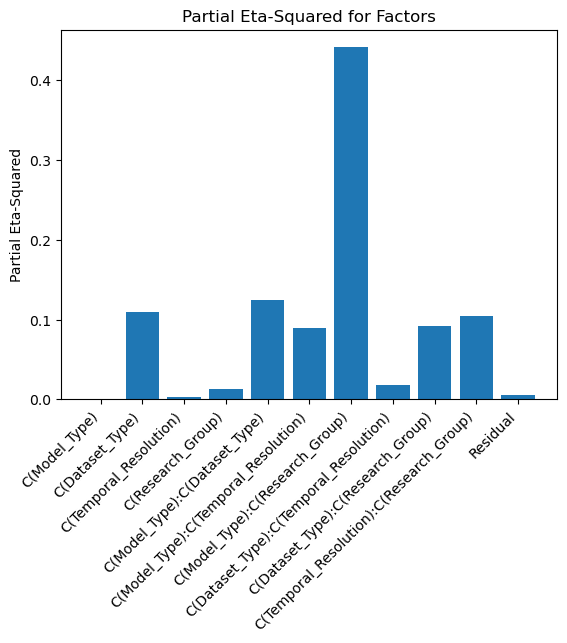

In [29]:
import matplotlib.pyplot as plt

anova_table['Factor'] = anova_table.index
plt.bar(anova_table['Factor'], anova_table['eta_squared'])
plt.title('Partial Eta-Squared for Factors')
plt.ylabel('Partial Eta-Squared')
plt.xticks(rotation=45, ha='right')
plt.show()

In [30]:
print(data['Dataset_Type'].unique())
print(data['Model_Type'].unique())

['NREL' 'Utility' 'Maui' 'Simulation' 'Korean Power']
['LSTM' 'GPR' 'BPNN' 'Sequence-to-Sequence' 'BSTS' 'Random Forest' 'SVR'
 'Physical PV Model' 'Probabilistic Model' 'ANN' 'CSSS' 'STGNN'
 'BPNN and CNN' 'DNN' 'FL-FTransformer' 'BNN' 'XGBoost']


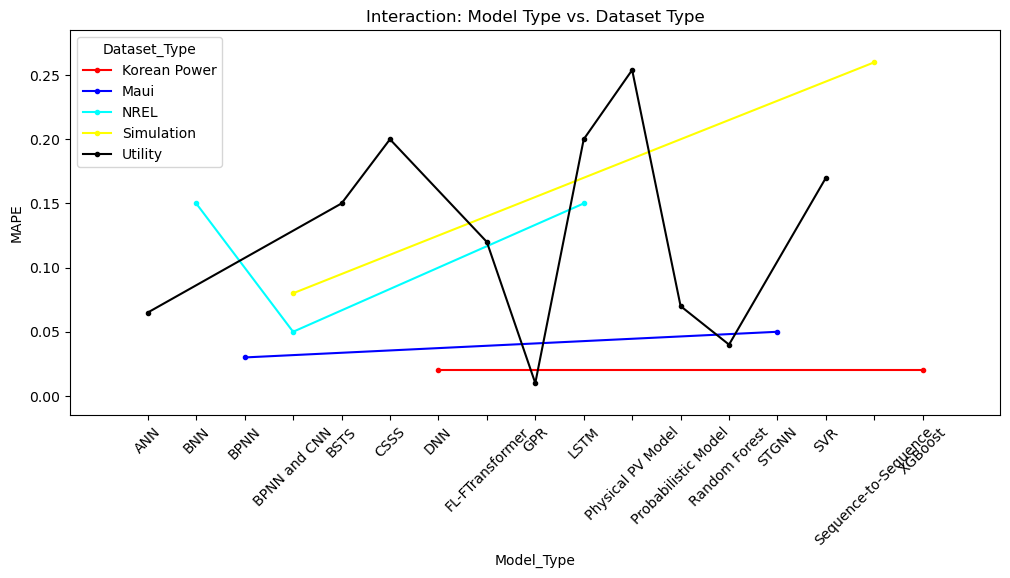

In [32]:
import statsmodels.graphics.factorplots as smf

# Example: Interaction between Model_Type and Dataset_Type
plt.rc("figure", figsize=(12,5))
smf.interaction_plot(data['Model_Type'], data['Dataset_Type'], data['MAPE'], colors=['red', 'blue', 'cyan', 'yellow', 'black'])
plt.title('Interaction: Model Type vs. Dataset Type')
plt.ylabel('MAPE')
plt.xticks(rotation=45)
plt.show()

## Performing Multivariate 4-way AMOVA test with both RMSE and MAPE as dependent variables

In [ ]:
## unsuccessful attempt for multivariate analysis

import pandas as pd
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

file_path = r"G:\My Drive\WVU_academic\CS_630\final_project_paper\both_rmse_mape_meta_analysis_study_data_processed_ver_2.csv"
data = pd.read_csv(file_path)

print(data.isna().any())

formula = 'RMSE + MAPE ~ C(Model_Type) + C(Dataset_Type) + C(Temporal_Resolution) + C(Research_Group) + \
           C(Model_Type):C(Dataset_Type) + C(Model_Type):C(Temporal_Resolution) + C(Model_Type):C(Research_Group) + \
           C(Dataset_Type):C(Temporal_Resolution) + C(Dataset_Type):C(Research_Group) + C(Temporal_Resolution):C(Research_Group)'

# Multivariate MANOVA
manova_model = MANOVA.from_formula(formula, data=data)
manova_results = manova_model.mv_test()

print(manova_results)


In [ ]:
## unsuccessful attempt for multivariate analysis

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.outliers_influence import variance_inflation_factor

file_path = r"G:\My Drive\WVU_academic\CS_630\final_project_paper\both_rmse_mape_meta_analysis_study_data_processed_ver_2.csv"
df = pd.read_csv(file_path)

scaler = StandardScaler()
df[['RMSE_std', 'MAPE_std']] = scaler.fit_transform(df[['RMSE', 'MAPE']])

# Checking for multicollinearity
independent_vars = ['Model_Type', 'Dataset_Type', 'Temporal_Resolution', 'Research_Group']
X = pd.get_dummies(df[independent_vars], drop_first=True)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factors:")
print(vif_data)

formula = "RMSE_std + MAPE_std ~ C(Model_Type) + C(Dataset_Type) + C(Temporal_Resolution) + C(Research_Group)"
formula += " + C(Model_Type):C(Dataset_Type) + C(Model_Type):C(Temporal_Resolution) + C(Model_Type):C(Research_Group)"
formula += " + C(Dataset_Type):C(Temporal_Resolution) + C(Dataset_Type):C(Research_Group)"
formula += " + C(Temporal_Resolution):C(Research_Group)"

manova = MANOVA.from_formula(formula, data=df)
print("\nMANOVA Results:")
print(manova.mv_test())

for dv in ['RMSE_std', 'MAPE_std']:
    print(f"\nUnivariate ANOVA for {dv}:")
    model = sm.formula.ols(f"{dv} ~ {formula.split('~')[1]}", data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

for dv in ['RMSE_std', 'MAPE_std']:
    for iv in independent_vars:
        print(f"\nTukey's HSD for {dv} by {iv}:")
        tukey = pairwise_tukeyhsd(df[dv], df[iv])
        print(tukey)
